# Trying gradient boosting algorithm

In [2]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')

df.head(5)

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1


In [4]:
df.shape

(2766, 10)

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select relevant columns
selected_columns = [ 'simplified_color_encoded', 'simplified_sex_encoded','age', 
                    'simplified_condition_encoded', 'simplified_type_encoded',
                     'days_stayed']

df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_stayed', axis=1)
y = df_selected['days_stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 2518.209344048627
Root Mean Squared Error: 50.18176306237782
Average Days Staying: 50.92960288808664
RMSE is less than Average Days Staying.
Mean Absolute Error: 37.55635976101635
R-squared Score: 0.005455


In [7]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age                             0.424830
simplified_condition_encoded    0.226163
simplified_color_encoded        0.181555
simplified_sex_encoded          0.091624
simplified_type_encoded         0.075828
dtype: float64


In [8]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
1378,7,55.893635,-48.893635
839,68,52.066861,15.933139
2163,29,62.311914,-33.311914
2618,19,53.028139,-34.028139
927,86,40.120351,45.879649
450,10,40.293616,-30.293616
368,72,55.490518,16.509482
1135,49,57.033795,-8.033795
1756,16,74.536430,-58.536430
296,38,62.634380,-24.634380


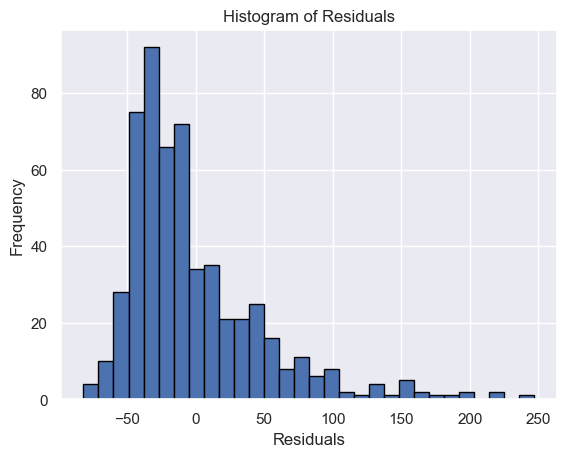

Average of Residuals: -1.8399223435300207
Average of Absolute Residuals: 37.55635976101635


In [9]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [10]:
df_residuals.head()

,Actual,Predicted,Residuals
1378,7,55.893635,-48.893635
839,68,52.066861,15.933139
2163,29,62.311914,-33.311914
2618,19,53.028139,-34.028139
927,86,40.120351,45.879649


In [11]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals


## ⬆︎⬆︎ GradientBoostingRegressor simple (R2 : 0.185790)  ⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe
selected_columns = [ 'simplified_color_encoded', 'simplified_sex_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                    'simplified_breed_encoded', 'simplified_size_encoded', 'days_in_shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
# ros = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 440.7511380880121
Root Mean Squared Error: 20.99407388021706
Average Days Staying: 29.845220030349015
RMSE is less than Average Days Staying.
Mean Absolute Error: 15.23989909165042
R-squared Score: 0.088214


In [21]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.397736
intake_age                      0.197743
simplified_type_encoded         0.135173
simplified_color_encoded        0.097037
simplified_size_encoded         0.065572
simplified_sex_encoded          0.060130
simplified_breed_encoded        0.046610
dtype: float64


In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
3100,16,33.984991,-23.0
3163,48,29.869518,17.0
3101,14,53.627165,-43.0
1947,2,26.372444,-23.0
2400,20,29.141436,-7.0
1350,49,21.002337,25.0
1465,2,27.504242,-26.0
239,68,49.964883,15.0
203,62,46.499858,15.0
3184,40,29.141436,13.0


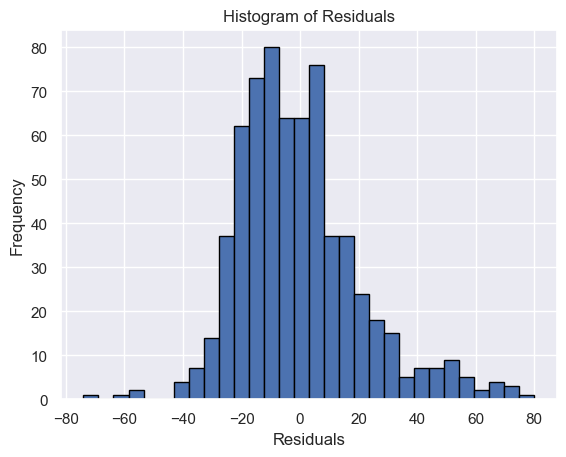

Average of Residuals: -0.46889226100151743
Average of Absolute Residuals: 15.998482549317147


In [29]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [31]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
605,41,38.851949,0.0
2841,11,17.325884,0.0
1868,26,22.090170,0.0
2381,23,28.873648,0.0
2216,22,19.752445,0.0
756,16,13.807711,0.0
430,14,15.978543,0.0
2852,23,28.873648,0.0
411,24,37.204331,0.0
3160,21,25.605057,0.0


## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV (R2 : 0.088214 )  ⬆︎⬆︎

## ⬇︎⬇︎ RandomForestRegressor no-sampling  ⬇︎⬇︎

In [32]:
independent_variables = [ 'simplified_color_encoded', 'simplified_sex_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                    'simplified_breed_encoded', 'simplified_size_encoded']
dependent_variable = 'days_in_shelter'

In [33]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(best_model.predict(X_test)) # 80, 80.2 (80) 81

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 406.494689
R-squared Score: 0.173312


In [34]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.469175
simplified_type_encoded         0.151076
intake_age                      0.150905
simplified_color_encoded        0.090965
simplified_sex_encoded          0.055683
simplified_size_encoded         0.049444
simplified_breed_encoded        0.032751
dtype: float64


## ⬆︎⬆︎ RandomForestRegressor w GridSearchCV (R2 : 0.173312 )  ⬆︎⬆︎

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

In [ ]:
y_pred

In [ ]:
print(y_test.tolist())

In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

# # You can also save the DataFrame to a CSV file if you want to analyze it further
# comparison_df.to_csv('comparison_results.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(comparison_df)
